<a href="https://colab.research.google.com/github/ljnmuyrong/Final-Examination/blob/main/Final_Exam_Model_Deployment_in_the_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Exam: Model Deployment in the Cloud

Muyrong

Caberte



In [106]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense, Activation, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras import models, regularizers, optimizers
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras import layers, models
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, Adamax
from keras.models import model_from_json
from PIL import Image
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import VGG16
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint
from keras.applications import DenseNet121
from keras.applications.densenet import DenseNet121, preprocess_input

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
dataset_dir = '/content/drive/MyDrive/Data'
data_paths = []
labels = []

main_dirs = os.listdir(dataset_dir)
for folder_name in main_dirs:
    folder_path = os.path.join(dataset_dir, folder_name)
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        data_paths.append(file_path)
        labels.append(folder_name)

In [109]:
batch_size = 16
image_size = (150, 150)
num_channels = 3
image_shape = (image_size[0], image_size[1], num_channels)

data_dirs = pd.Series(data_paths, name='data_dir')
classes = pd.Series(labels, name='class')
dataframe = pd.concat([data_dirs, classes], axis=1)

def preprocess_image(img):
    return img

In [110]:
train_df, val_test_df = train_test_split(dataframe, train_size=0.8, shuffle=True, random_state=123)
val_df, test_df = train_test_split(val_test_df, train_size=0.5, shuffle=True, random_state=123)

datagen = ImageDataGenerator(preprocessing_function=preprocess_image, rescale=1.0/255)
train_generator = datagen.flow_from_dataframe(train_df, x_col='data_dir', y_col='class',
                                              target_size=image_size, class_mode='categorical',
                                              color_mode='rgb', shuffle=True, batch_size=batch_size)
valid_generator = datagen.flow_from_dataframe(val_df, x_col='data_dir', y_col='class',
                                              target_size=image_size, class_mode='categorical',
                                              color_mode='rgb', shuffle=True, batch_size=batch_size)
test_generator = datagen.flow_from_dataframe(test_df, x_col='data_dir', y_col='class',
                                             target_size=image_size, class_mode='categorical',
                                             color_mode='rgb', shuffle=True, batch_size=batch_size)

Found 367 validated image filenames belonging to 4 classes.
Found 47 validated image filenames belonging to 4 classes.
Found 47 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 17 invalid image filename(s) in x_col="data_dir". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="data_dir". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="data_dir". These filename(s) will be ignored.
  warnings.warn(


In [111]:
class_indices = train_generator.class_indices
print(class_indices)

step_size_train = train_generator.n // train_generator.batch_size
step_size_valid = valid_generator.n // valid_generator.batch_size

print(dataframe)

{'Dinosaur': 0, 'Flag': 1, 'airplane': 2, 'puppy': 3}
                                              data_dir  class
0       /content/drive/MyDrive/Data/puppy/image44.jpeg  puppy
1      /content/drive/MyDrive/Data/puppy/images130.jpg  puppy
2        /content/drive/MyDrive/Data/puppy/image3.jpeg  puppy
3      /content/drive/MyDrive/Data/puppy/images150.jpg  puppy
4         /content/drive/MyDrive/Data/puppy/image.jpeg  puppy
..                                                 ...    ...
475  /content/drive/MyDrive/Data/Flag/800px-Flag_of...   Flag
476  /content/drive/MyDrive/Data/Flag/bandiera-ital...   Flag
477  /content/drive/MyDrive/Data/Flag/2560px-Flag_o...   Flag
478       /content/drive/MyDrive/Data/Flag/AF-flag.jpg   Flag
479  /content/drive/MyDrive/Data/Flag/e6b8da99-250b...   Flag

[480 rows x 2 columns]


In [112]:
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3) ,
    classes=4
)

In [113]:
for layer in base_model.layers:
    layer.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [114]:
checkpoint_path = "/content/drive/MyDrive/Data/bestmodel.hdf5.h5"
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


In [115]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
# Convert labels to numpy arrays
train_labels_array = np.array(train_generator.labels)
valid_labels_array = np.array(valid_generator.labels)

# Check label encoding
print("Shape of train labels:", train_labels_array.shape)
print("Shape of validation labels:", valid_labels_array.shape)

# Check model output configuration
model.summary()


Shape of train labels: (367,)
Shape of validation labels: (47,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_10 (Dense)            (None, 1024)              16778240  
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                        

In [117]:
# Check number of unique classes in your dataset
num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)

x_batch, y_batch = next(train_generator)
print("Shape of batch labels:", y_batch.shape)

print("Example labels:", y_batch[:5])


Number of classes: 4
Shape of batch labels: (16, 4)
Example labels: [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [118]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[checkpoint]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/22 [==============================] - ETA: 0s - loss: 4.2344 - accuracy: 0.6125
Epoch 1: val_accuracy improved from -inf to 0.84375, saving model to /content/drive/MyDrive/Data/bestmodel.hdf5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 55s 2s/step - loss: 4.2344 - accuracy: 0.6125 - val_loss: 0.7166 - val_accuracy: 0.8438
Epoch 2/10
22/22 [==============================] - ETA: 0s - loss: 0.9095 - accuracy: 0.8575
Epoch 2: val_accuracy did not improve from 0.84375
22/22 [==============================] - 45s 2s/step - loss: 0.9095 - accuracy: 0.8575 - val_loss: 0.5354 - val_accuracy: 0.8438
Epoch 3/10
22/22 [==============================] - ETA: 0s - loss: 0.4409 - accuracy: 0.9031
Epoch 3: val_accuracy improved from 0.84375 to 0.87500, saving model to /content/drive/MyDrive/Data/bestmodel.hdf5.h5
22/22 [==============================] - 50s 2s/step - loss: 0.4409 - accuracy: 0.9031 - val_loss: 0.9046 - val_accuracy: 0.8750
Epoch 4/10
22/22 [==============================] - ETA: 0s - loss: 0.2166 - accuracy: 0.9630
Epoch 4: val_accuracy improved from 0.87500 to 0.93750, saving model to /content/drive/MyDrive/Data/bestmodel.hdf5.h5
22/22 [==============================] - 55s

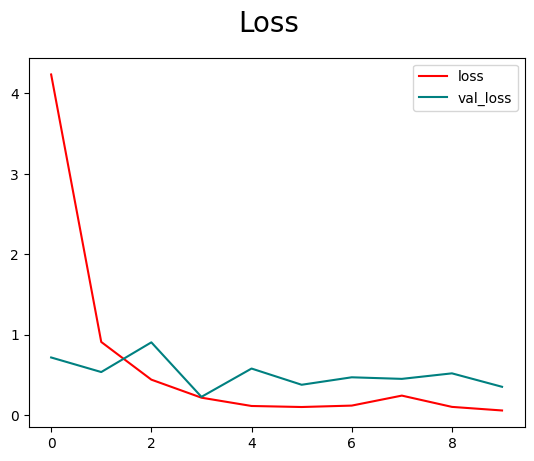

In [119]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='teal', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

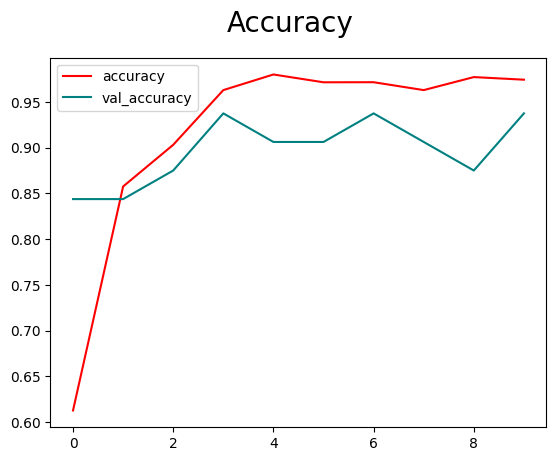

In [120]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='red', label='accuracy')
plt.plot(history.history['val_accuracy'], color='teal', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [121]:
!pip install streamlit


In [122]:
!pip install pyngrok


In [123]:
%%writefile app.py

Overwriting app.py


In [124]:
import streamlit as st
import requests
import h5py
import tensorflow as ft
from io import BytesIO
from PIL import Image

In [125]:
@st.cache(allow_output_mutation=True)
def load_model():
    base_url = "https://github.com/kdalangan/EmTech2-FinalProject/raw/main/"
    model_parts = [f"{base_url}bestmodel.hdf5.h5.part{i:02d}" for i in range(1, 35)]

    model_bytes = b''
    for part_url in model_parts:
        response = requests.get(part_url)
        model_bytes += response.content

    with h5py.File(BytesIO(model_bytes), 'r') as hf:
        model = tf.keras.models.load_model(hf)

    return model

In [126]:
def predict(image, model):
    img_array = np.array(image)
    img_array = tf.image.resize(img_array, (150, 150))
    img_array = tf.expand_dims(img_array, 0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_class = class_mapping[np.argmax(predictions[0])]
    return predicted_class

In [127]:

st.title('Weather Classification')
uploaded_file = st.file_uploader("Choose a weather image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    model = load_model()

    predicted_class = predict(image, model)
    st.write(f"Prediction: {predicted_class}")

In [128]:
!streamlit run app.py &>/dev/null&


In [129]:
!ngrok config add-authtoken 2gcsXIj9AYMniXnkaJLyBjaBgm3_5Kz6QrCZK5euyXT95EfZK

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [130]:
!pgrep streamlit

44414
44710
45218
50496


In [131]:
from pyngrok import ngrok

public_url = ngrok.connect(addr='8501')
print(f"Streamlit URL: {public_url}")

!streamlit run /content/drive/MyDrive/CPE019-FinalProject/weather.py &>/dev/null&

PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2gcuUxgrgKyZndT0AHw2Qbk4hO6, tn_2gcukQjpAoiu5LMEHhW6GhqF2pX, tn_2gcv6vd0Atl2MCI2QGAPu6XON90\n\r\n\r\nERR_NGROK_324\r\n"}}
